In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
fba = pd.read_csv('../result/fba_mse_glu_glc.csv', index_col=0)
t = pd.read_csv('../result/slope.csv', index_col=0).T
v = pd.DataFrame(pd.read_excel('../result/lac.xlsx').mean()).T
v.columns = t.columns
slope = pd.concat([t, v])
slope = slope.rename(index={0:'Lactate'})
slope = pd.concat([slope, pd.DataFrame([22, 12.5, 17], columns=['Doubling Time'] , index=slope.columns).T])

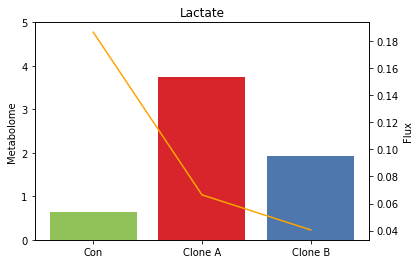

In [5]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], slope.T['Lactate'], color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 5)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['Lactate_output']), color='orange')
ax2.set_ylabel('Flux')
# ax2.set_ylim(0, 0.07)
ax.set_title('Lactate')
plt.show()

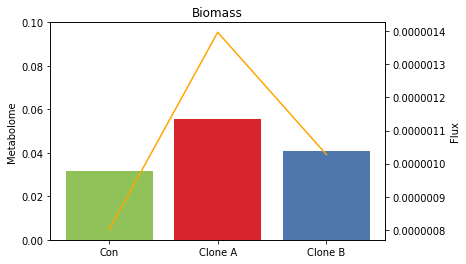

In [6]:
fig, ax = plt.subplots()

ax2 = ax.twinx()
p1 = ax.bar(['Con', 'Clone A', 'Clone B'], [np.log(2)/i for i in slope.T['Doubling Time']], color=['#91c259', '#d8252b', '#4e78ad'])
ax.set_ylim(0, 0.1)
ax.set_ylabel('Metabolome')
ax2.plot(['Con', 'Clone A', 'Clone B'], np.array(fba.loc['BIOMASS']), color='orange')
ax2.set_ylabel('Flux')
# ax2.set_ylim(0, 0.004)
ax.set_title('Biomass')
plt.show()